In [151]:
import time
from math import isclose
from random import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython import display

def is_intersect1(a, b):#corrected version by projecton check 
    s1 = ( a.x >= b.x and a.x <= (b.x + b.dx)) or ( (a.x + a.dx) >= b.x and (a.x + a.dx) <= (b.x + b.dx) )
    s2 = ( a.y >= b.y and a.y <= (b.y + b.dy)) or ( (a.y + a.dy) >= b.y and (a.y + a.dy) <= (b.y + b.dy) )
    s3 = ( b.x >= a.x and b.x <= (a.x + a.dx)) or ( (b.x + b.dx) >= a.x and (b.x + b.dx) <= (a.x + a.dx) )
    s4 = ( b.y >= a.y and b.y <= (a.y + a.dy)) or ( (b.y + b.dy) >= a.y and (b.y + b.dy) <= (a.y + a.dy) )

    return ((s1 and s2) or (s3 and s4)) or ((s1 and s4) or (s3 and s2));

    
    #return  not((a.x > (b.x + b.dx) ) or ((a.x + a.dx) < b.x) or (a.y > (b.y + b.dy)) or ((a.y + a.dy) < b.y))

def is_intersect2(a,b):# incorrect version by angle points check 
    
    chk = False
    l1 = a.vertLst()   
    l2 = b.vertLst()
    r2 = a.rect()   
    r1 = b.rect()
    
    for v in l1:
        if (r1[0][0] <= v[0] <= r1[0][1]) and (r1[1][0] <= v[1] <= r1[1][1]):
            
            chk = True
        
    for v in l2:
        if (r2[0][0] <= v[0] <= r2[0][1]) and (r2[1][0] <= v[1] <= r2[1][1]):
            chk = True
    
    return chk
    

class Building():
    def __init__(self, x, y, dx, dy):
        self.x = x
        self.y = y
        self.dx = dx
        self.dy = dy
    
    def __and__(self, other):
        
        if (type(other) == Building):
            return is_intersect1(self,other)
        else:
            res = False;
            for el in other:
                res = (res or is_intersect1(self,el))
            return res
    
    def __repr__(self):
        return str([(self.x, self.y), (self.dx, self.dy)])
    
    def rect(self):# #return list of top-left and down-right vertexes of rectangle
        return [(self.x, self.x + self.dx), (self.y, self.y + self.dy)]
    
    def vertLst(self):# return list of vertexes
        return [(self.x, self.y), (self.x, self.y + self.dy), (self.x + self.dx, self.y), (self.x + self.dx, self.y + self.dy)]
    
    def area(self):
        return self.dx * self.dy

            
        
def visualize_test():
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')
    for i in range(90):
        x1, y1, dx1, dy1 = random(), random(), random(), random()
        b1 = Building(x1,y1,dx1,dy1)
        
        x2, y2, dx2, dy2 = random(), random(), random(), random()
        b2 = Building(x2,y2,dx2,dy2)
        
        if(is_intersect1(b1, b2) != is_intersect2(b1,b2)):
            
            print(str(is_intersect1(b1,b2)))
            print(str(is_intersect2(b1,b2)))
            ax1.add_patch(
                patches.Rectangle((x1-dx1/2, y1-dy1/2), dx1, dy1, alpha=0.1)
            );
            ax1.add_patch(
                patches.Rectangle((x2-dx2/2, y2-dy2/2), dx2, dy2, alpha=0.1)
            );    
            print(b1)
            print(b2)
            
            break
    print('Test complete')
        
def check():
    a = isclose(1,2,abs_tol = 1e-5)
    print(a)
    
    visualize_test()
    
    b1 = Building(1,2,7,1)
    b2 = Building(3,1,2,8)
    b3 = Building(7,7,10,10)
    print('Проверка для кортежей: ' + str(b1 & (b2, b3)))
    
    

False
Test complete
Проверка для кортежей: True


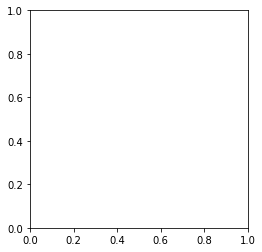

In [152]:
check()